In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

import yfinance as yf
from yahoofinancials import YahooFinancials

from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

sns.set_style("whitegrid")

In [2]:
#loading dataset by using yfinance
NFLX = yf.download('NFLX',
                start='2002-06-01',
                end='2022-01-31',
                progress=False,
                )
NFLX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600
2002-06-06,1.150000,1.232143,1.148571,1.182143,1.182143,2305800
2002-06-07,1.177857,1.177857,1.103571,1.118571,1.118571,1369200


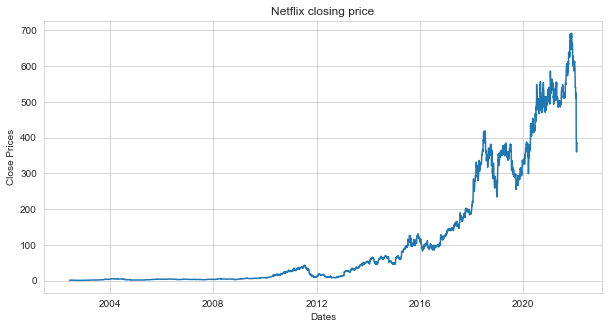

In [3]:
#Visualize the daily closing price
plt.figure(figsize=(10,5))
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(NFLX['Close'])
plt.title('Netflix closing price')
plt.show()

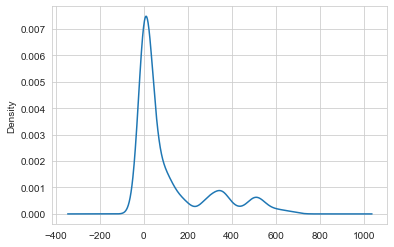

In [4]:
#Distribution of the dataset
cp = NFLX['Close']
cp.plot(kind='kde')

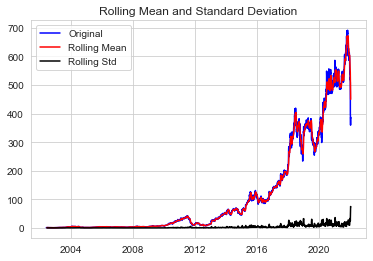

Results:
Test Statistics                  -0.470506
p-value                           0.897645
No. of lags used                 30.000000
Number of observations used    4920.000000
critical value (1%)              -3.431680
critical value (5%)              -2.862128
critical value (10%)             -2.567083
dtype: float64


In [5]:
#Creating stationarity test
def stationarity_check(ts):
    
    #using mean and standard deviatoin as rolling statistics
    rm = ts.rolling(12).mean()
    rs = ts.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(ts, color='blue',label='Original')
    plt.plot(rm, color='red', label='Rolling Mean')
    plt.plot(rs, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results:")
    adft = adfuller(cp,autolag='AIC')
    
    #defining output values
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
stationarity_check(cp)